In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

import statsmodels.api as sm
import statsmodels.formula.api as smf 

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
df=pd.read_csv("final-data.csv")

In [5]:
df.head()

,the_index,Title,DomesticTotalGross,RunTime,ReleaseDate,Director,ProductionBudget,InRelease,Distributor,Genre,...,GenreMap_Horror,GenreMap_Other,GenreMap_Period,GenreMap_Romantic Comedy,GenreMap_Sci-Fi,GenreMap_Western,MpaaRating_G,MpaaRating_PG,MpaaRating_PG-13,MpaaRating_R
0,http://www.boxofficemojo.com/movies/?id=ali.htm,Ali,58203105.0,156.0,2001-12-25,Michael Mann,107000000.0,52,Sony / Columbia,Sports Drama,...,0,0,0,0,0,0,0,0,0,1
1,http://www.boxofficemojo.com/movies/?id=americ...,America's Sweethearts,93607673.0,102.0,2001-07-20,Joe Roth,46000000.0,101,Sony (Revolution),Romantic Comedy,...,0,0,0,1,0,0,0,0,1,0
2,http://www.boxofficemojo.com/movies/?id=anygiv...,Any Given Sunday,75530832.0,157.0,1999-12-22,Oliver Stone,55000000.0,100,Warner Bros.,Sports Drama,...,0,0,0,0,0,0,0,0,0,1
3,http://www.boxofficemojo.com/movies/?id=babybo...,Baby Boy,28734552.0,129.0,2001-06-27,John Singleton,16000000.0,75,Sony / Columbia,Drama,...,0,0,0,0,0,0,0,0,0,1
4,http://www.boxofficemojo.com/movies/?id=bicent...,Bicentennial Man,58223861.0,131.0,1999-12-17,Chris Columbus,100000000.0,168,Buena Vista,Sci-Fi,...,0,0,0,0,1,0,0,1,0,0


In [6]:
df=df.set_index('the_index')

In [7]:
df.columns

Index(['Title', 'DomesticTotalGross', 'RunTime', 'ReleaseDate', 'Director',
       'ProductionBudget', 'InRelease', 'Distributor', 'Genre', 'Nominations',
       'Wins', 'IntDayOfTheYear', 'IntMonthOfTheYear', 'DayOfTheYear^2',
       'OpeningGross', 'OpeningRank', 'OpeningRatio', 'GenreMap_Action',
       'GenreMap_Animation', 'GenreMap_Comedy', 'GenreMap_Crime',
       'GenreMap_Documentary', 'GenreMap_Drama', 'GenreMap_Family',
       'GenreMap_Fantasy', 'GenreMap_Horror', 'GenreMap_Other',
       'GenreMap_Period', 'GenreMap_Romantic Comedy', 'GenreMap_Sci-Fi',
       'GenreMap_Western', 'MpaaRating_G', 'MpaaRating_PG', 'MpaaRating_PG-13',
       'MpaaRating_R'],
      dtype='object')

In [8]:
# define features and target
# 10% hold out data

In [9]:
df[(df.OpeningGross>20000000) & (df.OpeningRatio<20) & (df.GenreMap!='Comedy')]
#use this for feature selection in our case right now

AttributeError: 'DataFrame' object has no attribute 'GenreMap'

In [10]:
features, target = ['DomesticTotalGross','RunTime','ProductionBudget','InRelease','OpeningRatio','OpeningGross'], 'Nominations'
#features, target = ['InRelease'], 'Nominations'
X, y = df[features], df[target].tolist()
X_train, X_holdout, y_train, y_holdout = train_test_split(df[features], df[target], test_size=0.3)

In [11]:
m = LinearRegression()
m.fit(X_train,y_train)
print(m.score(X_train,y_train))
m.score(X_holdout,y_holdout)
#test score is consistently less than the train -> overfitting -> lasso
# tend alternate -> outliers
# outliers result based on situation

0.3097445771908238


0.4403500453258917

In [108]:
m.coef_

array([ 1.51681183e-08,  2.50362675e-02,  8.17298085e-10,  1.13992247e-02,
        1.71270823e-02, -4.93346187e-08])

In [64]:
model = sm.OLS(y_train.astype(float),X_train.astype(float))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Nominations   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     99.01
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           3.86e-99
Time:                        14:28:08   Log-Likelihood:                -1806.8
No. Observations:                1080   AIC:                             3626.
Df Residuals:                    1074   BIC:                             3656.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
DomesticTotalGross  1.218e-08   1.46e-09      8.327      0.000    9.31e-09    1.51e-08
RunTime                0.0102      0.002      5.952      0.000       0.007       0.014
ProductionBudget    1.171e-09   9.91e-10      1.182      0.238   -7.73e-10    3.11e-09
InRelease              0.0017      0.001      1.431      0.153      -0.001       0.004
OpeningRatio          -0.0314      0.004     -7.315      0.000      -0.040      -0.023
OpeningGross       -3.184e-08   4.44e-09     -7.174      0.000   -4.06e-08   -2.31e-08
==============================================================================
Omnibus:                      904.411   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23802.340
Skew:                           3.771   Prob(JB):                         0.00
Kurtosis:                      24.727   Cond. No.                     1.75e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### the bad
* still highly likely multi colinearity ( opening gross & total domestic gross)
* r*2 of .356 ... increase from .335 after selecting features with low P>|t|

#### the sorta good
* the P>|t| vals are worse, particularly for run time( 0 to .65), inrelease, int day of year(.3 to .5)
* prod budget still .01, opening gross and domestic gross still 0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


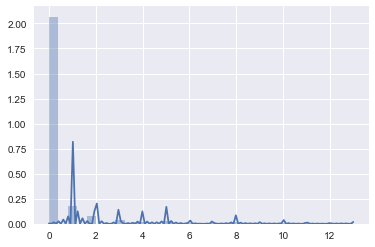

In [49]:
sns.distplot(y_train)

* highly skewed distribution to the right - probs gonna need to log

In [12]:
### rando first model

In [47]:
# split x_train into 5 folds for cross val

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [48]:
lm1=LinearRegression()

scores = cross_val_score(lm1, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

lm1.fit(X_train, y_train)

[0.33386001 0.30083052 0.2919044  0.37394714 0.38781901]
Linear Reg Mean Score:  0.3376722166206605


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

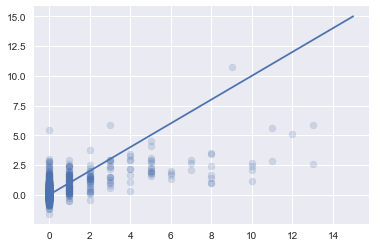

In [49]:
# Fitted vs. Actual
y_train_pred = lm1.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 15], [0, 15])

Text(0.5,1,'Actual vs. Residuals')

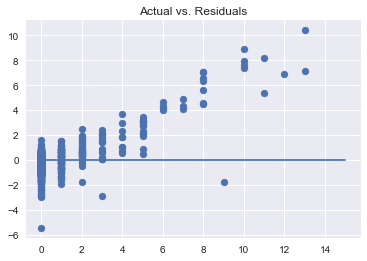

In [50]:
# Plot Residuals

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train, lin_reg_residuals)
plt.plot([0,15], [0, 0])
plt.title("Actual vs. Residuals")

* linear residuals is not a great thing. Model is under fitting for outliers?
* Bias

### ridge cross val

In [51]:
ridge_model1=Ridge()

ridge_scores = cross_val_score(ridge_model1, X_train, y_train, cv=kfold)
print(ridge_scores)
print("Ridge Model Score: ", np.mean(ridge_scores))

ridge_model1.fit(X_train, y_train)

[0.33386094 0.3008306  0.29190464 0.37394721 0.38781846]
Ridge Model Score:  0.3376723678308621


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

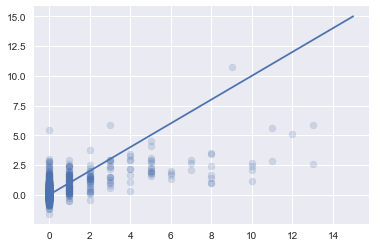

In [52]:
# Fitted vs. Actual
y_train_pred = ridge_model1.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 15], [0, 15])

### Lasso cross val

In [53]:
lasso_model1=Lasso()

lasso_scores = cross_val_score(lasso_model1, X_train, y_train, cv=kfold)
print(lasso_scores)
print("Lasso Model Score: ", np.mean(lasso_scores))

lasso_model1.fit(X_train, y_train)

[0.35246406 0.29624558 0.29305785 0.37387187 0.3580473 ]
Lasso Model Score:  0.3347373349204764


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

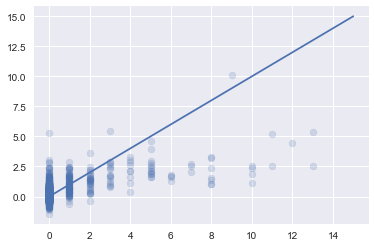

In [54]:
# Fitted vs. Actual
y_train_pred = lasso_model1.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 15], [0, 15])